<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [3]:
# A:
df=pd.read_csv(sac_csv)

In [4]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [5]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


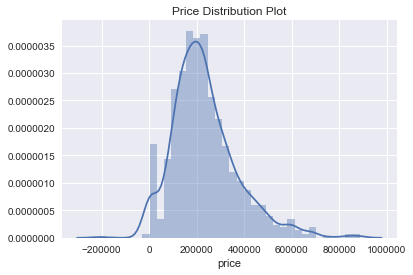

In [6]:
sns.distplot(df['price'])
sns.plt.title('Price Distribution Plot')

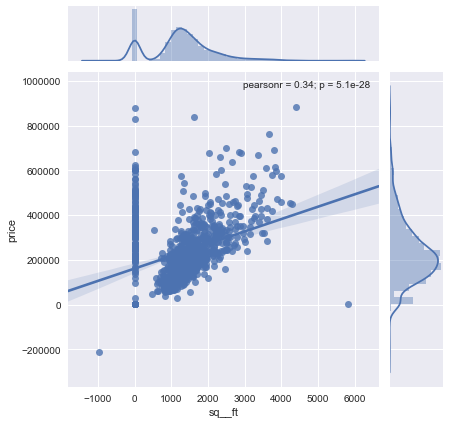

In [7]:
sns.jointplot(x='sq__ft',y='price',data=df, kind='reg')

In [8]:
corr_df=df[['beds','baths','sq__ft','price']].corr()
corr_df

,beds,baths,sq__ft,price
beds,1.000000,0.839650,0.684999,0.344752
baths,0.839650,1.000000,0.665326,0.416718
sq__ft,0.684999,0.665326,1.000000,0.339628
price,0.344752,0.416718,0.339628,1.000000


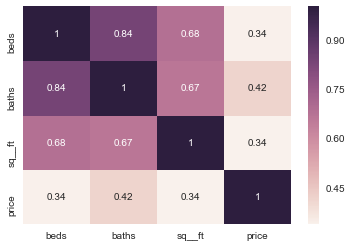

In [9]:
sns.heatmap(corr_df,annot=True)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

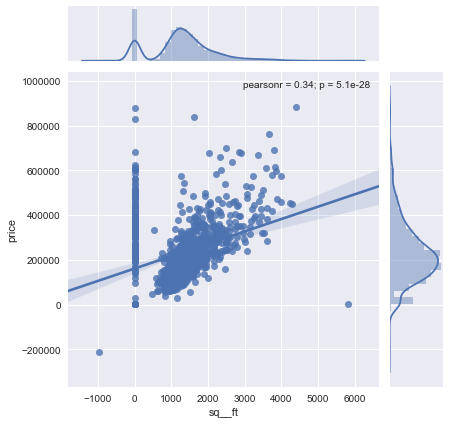

In [10]:
# price and sq__ft
sns.jointplot(x='sq__ft',y='price',data=df, kind='reg')
# sq__ft has positive relationship with price

In [11]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

X_sqft = df[["sq__ft"]]
y = df[['price']] 

model_1 = lm.fit(X_sqft, y)

In [12]:
print('R^2 of sqft is ',model_1.score(X_sqft,y))

R^2 of sqft is  0.115347352266


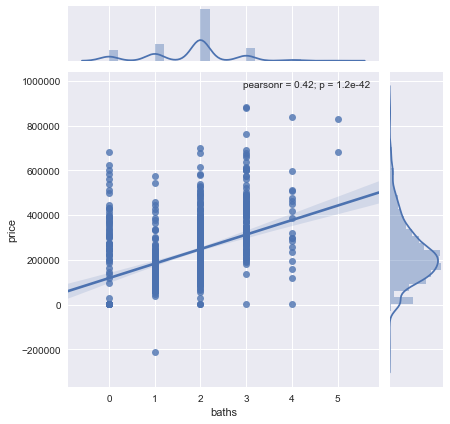

In [13]:
# price and baths
sns.jointplot(x='baths',y='price',data=df, kind='reg')
# baths has positive relationship with price

In [14]:
X_baths = df[["baths"]]
model_2 = lm.fit(X_baths, y)
print('R^2 of baths is ',model_2.score(X_baths,y))

R^2 of baths is  0.17365426376


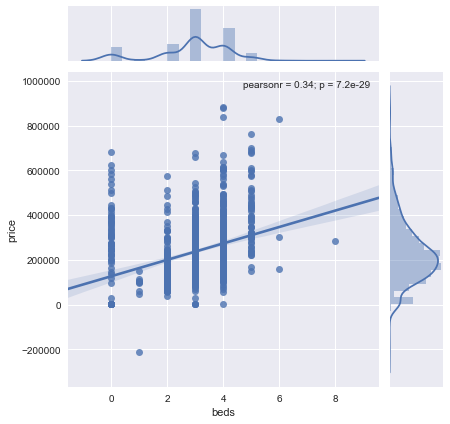

In [15]:
# price and beds
sns.jointplot(x='beds',y='price',data=df, kind='reg')
# beds has positive relationship with price

In [16]:
X_beds = df[["beds"]]
model_3 = lm.fit(X_beds, y)
print('R^2 of beds is ',model_3.score(X_beds,y))

R^2 of beds is  0.118853724751


In [17]:
X_lati = df[["latitude"]]
model_4 = lm.fit(X_lati, y)
print('R^2 of latitude is ',model_4.score(X_lati,y))

R^2 of latitude is  0.010161770605


In [18]:
X_longti = df[["longitude"]]
model_5 = lm.fit(X_longti, y)
print('R^2 of longitude is ',model_5.score(X_longti,y))

R^2 of longitude is  0.00888533495794


### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [19]:
# A:Baths has the largest R^2 that explains the most variability.
#Bath is the best predictor.

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [20]:
lm = linear_model.LinearRegression()

X = df[['baths']]
y = df[['price']] 

model = lm.fit(X, y)

In [21]:
model.score(X,y)

0.17365426375990256

In [22]:
# A:

print('slope:', model.coef_)
print('intercept',model.intercept_)

slope: [[ 64733.89155502]]
intercept [ 118706.49926772]


### 6. Interpret the intercept. Interpret the slope.

In [23]:
# A:For every extra bathroom increase in a house, the house price is increased by $64733.89.
#The price for the house with 0 bathrooms is $118706.499

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [24]:
# A:
#For prediction:
#Use the model to predict the price of house by the number of bathrooms of the house.

#For inference:
#Get a appoximate price of the house by the number of bathrooms 
#of the house when trying to buy a house.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [27]:
lm = linear_model.LinearRegression()

X = df[['baths']]
y = df[['price']] 

model = lm.fit(X, y)

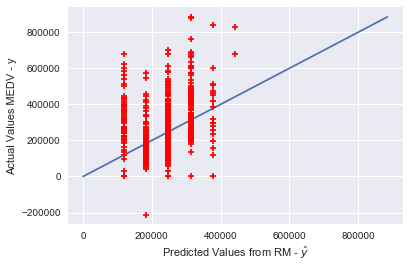

In [28]:
# A:

predictions = model.predict(X)
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()